In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
#import statsmodels.api as sm

In [4]:
# Liên kết google drive và google colab
#from google.colab import drive
#drive.mount('/content/gdrive')

In [5]:
# Đọc dữ liệu
#df = pd.read_csv("/content/gdrive/MyDrive/PTDL/Do An/Diet_R.csv")
df = pd.read_csv("Diet_R.csv")

In [6]:
df.head()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3


In [7]:
# Xóa những người bị thiếu dữ liệu
df.drop(df.loc[df.Person == 25].index, inplace = True)
df.drop(df.loc[df.Person == 26].index, inplace = True)

In [8]:
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
5,4,0,33,171,64,1,61.1
6,5,0,50,170,65,1,62.2
...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2
74,75,1,49,177,84,3,79.9
75,76,1,28,164,85,3,79.7
76,77,1,40,167,87,3,77.8


In [9]:
# Sắp xếp lại số thứ tự 
serial = []
print(len(df))
for i in range (1, len(df) + 1):
    serial.append(i)
df['Person'] = serial
gen = df.set_index('Person')
df_new = gen.sort_index()
df_new

76


,gender,Age,Height,pre.weight,Diet,weight6weeks
Person,,,,,,
1,0,22,159,58,1,54.2
2,0,46,192,60,1,54.0
3,0,55,170,64,1,63.3
4,0,33,171,64,1,61.1
5,0,50,170,65,1,62.2
...,...,...,...,...,...,...
72,1,35,183,83,3,80.2
73,1,49,177,84,3,79.9
74,1,28,164,85,3,79.7


Phát biểu giả thuyết
- $$H_{0}: \mu_{0} = \mu_{1}$$
    Cân nặng trung bình của trước và sau khi giảm cân là bằng nhau
- $$H_{1}: \mu_{0} <> \mu_{1}$$
    Cân nặng trung bình của trước và sau khi giảm cân là khác nhau

In [10]:
stat, p_value = stats.ttest_ind(df["pre.weight"], df["weight6weeks"])
print('Stat =', stat, 'P_value =', p_value)
if p_value < 0.05:
    print("Có bằng chứng thống kê để bác bỏ giả thuyết H0.")
else:
    print("Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0.")

Stat = 3.0342255247628476 P_value = 0.0028431949414180584
Có bằng chứng thống kê để bác bỏ giả thuyết H0.


Text(0.5, 1.0, 'Cân nặng trước và sau khi giảm cân')

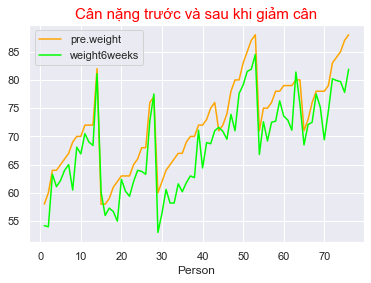

In [11]:
sns.set()
df_new[['pre.weight', 'weight6weeks']].plot(color = ['orange', 'lime'])
plt.title('Cân nặng trước và sau khi giảm cân', fontsize = 15, color = 'red')

In [12]:
#Tính chỉ số cân năng đã giảm
#Thêm cột cân nặng đã giảm
weightlost = df_new["pre.weight"] - df_new["weight6weeks"] 
df_new['weightlost'] = weightlost.values
df_new.head()

,gender,Age,Height,pre.weight,Diet,weight6weeks,weightlost
Person,,,,,,,
1,0,22,159,58,1,54.2,3.8
2,0,46,192,60,1,54.0,6.0
3,0,55,170,64,1,63.3,0.7
4,0,33,171,64,1,61.1,2.9
5,0,50,170,65,1,62.2,2.8


In [18]:
#Kết hợp với đọc tài liệu docx ta biết được n = 76 và có 3 nhóm diet: 1, 2, 3
weightlost_1 = []
weightlost_2 = []
weightlost_3 = []
df_1 = df_new[['Diet', 'weightlost', 'gender']]
wl = data1["weightlost"]
gd = data1["gender"]
diet = df_1['Diet']

for i in df_1.index:
    if diet[i] == 1 :
        weightlost_1.append(wl[i])
    if diet[i] == 2:
        weightlost_2.append(wl[i])
    if diet[i] == 3:
        weightlost_3.append(wl[i])
    
weight_lost = list(zip(weightlost_1, weightlost_2, weightlost_3))
df =  pd.DataFrame(weight_lost, columns = ("Diet 1", "Diet 2", "Diet 3"))
df.head()

,Diet 1,Diet 2,Diet 3
0,3.8,-2.1,7.0
1,6.0,2.0,5.6
2,0.7,1.7,3.4
3,2.9,4.3,6.8
4,2.8,7.0,7.8


In [15]:
diet1 = df['Diet 1']
diet2 = df['Diet 2']
diet3 = df['Diet 3']

In [16]:
Kolmogorov(diet1)
hist_plot(diet1)

NameError: name 'Kolmogorov' is not defined